# count points in a grid

## use of np.histogram2d

Created a 3D mesh and counts points on each cell(grid):

https://stackoverflow.com/questions/33970021/using-numpy-arrays-to-count-the-number-of-points-within-the-cells-of-a-regular-g

/tmp/ipykernel_2177/1224163875.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both')


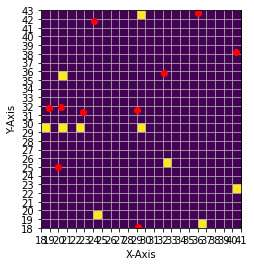

In [3]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load in X,Y,Z values from a sub-sample of 10 points for testing
# XY Values are scaled to a reasonable point of origin
z_vals = np.array([3.08,4.46,0.27,2.40,0.48,0.21,0.31,3.28,4.09,1.75])
x_vals = np.array([22.88,20.00,20.36,24.11,40.48,29.08,36.02,29.14,32.20,18.96])
y_vals = np.array([31.31,25.04,31.86,41.81,38.23,31.57,42.65,18.09,35.78,31.78])

# Updated code below
# Variables needed for 2D,3D histograms
xmax, ymax, zmax = int(x_vals.max())+1, int(y_vals.max())+1, int(z_vals.max())+1
xmin, ymin, zmin = int(x_vals.min()), int(y_vals.min()), int(z_vals.min())
xrange, yrange, zrange = xmax-xmin, ymax-ymin, zmax-zmin
xedges = np.linspace(xmin, xmax, (xrange + 1), dtype=int)
yedges = np.linspace(ymin, ymax, (yrange + 1), dtype=int)
zedges = np.linspace(zmin, zmax, (zrange + 1), dtype=int)

# Make the 2D histogram
h2d, xedges, yedges = np.histogram2d(x_vals, y_vals, bins=(xedges, yedges))
assert np.count_nonzero(h2d) == len(x_vals), "Unclassified points in the array"
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(h2d.transpose(), extent=extent,  interpolation='none') #, origin='low')
# Transpose and origin must be used to make the array line up when using imshow, unsure why
# Plot settings, not sure yet on matplotlib update/override objects
plt.grid(b=True, which='both')
plt.xticks(xedges)
plt.yticks(yedges)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.plot(x_vals, y_vals, 'ro')
plt.show()

# # 3-dimensional histogram with 1 x 1 x 1 m bins. Produces point counts in each 1m3 cell.
# xyzstack = np.stack([x_vals,y_vals,z_vals], axis=1)
# h3d, Hedges = np.histogramdd(xyzstack, bins=(xedges, yedges, zedges))
# assert np.count_nonzero(h3d) == len(x_vals), "Unclassified points in the array"
# h3d.shape  # Shape of the array should be same as the edge dimensions
# testzbin = np.sum(np.logical_and(z_vals >= 1, z_vals < 2))  # Slice to test with
# np.sum(h3d[:,:,1]) == testzbin  # Test num points in second bins
# np.sum(h3d, axis=2)  # Sum of all vertical points above each x,y 'pixel'
# # only in this example the h2d and np.sum(h3d,axis=2) arrays will match as no z bins have >1 points

# # Remaining issue - how to get a r x c count of empty z bins.
# # i.e. for each 'pixel'  how many z bins contained no points?
# # Possible solution is to reshape to use logical operators
# count2d = h3d.reshape(xrange * yrange, zrange)  # Maintain dimensions per num 3D cells defined
# zerobins = (count2d == 0).sum(1)
# zerobins.shape
# # Get back to x,y grid with counts - ready for output as image with counts=pixel digital number
# bincount_pixels = zerobins.reshape(xrange,yrange)
# # Appears to work, perhaps there is a way without reshapeing?


## numpy meshgrid

https://www.javatpoint.com/numpy-meshgrid

creating a meshgrid with numpy 

## matrix of coordinates

https://stackoverflow.com/questions/24436063/numpy-matrix-of-coordinates

## counting values between interval

https://stackoverflow.com/questions/2946519/counting-number-of-values-between-interval

you will have to iterate the list at least once.

The solution below works with any sequence/interval that implements comparision (<, >, etc) and uses bisect algorithm to find the correct point in the interval, so it is very fast.

It will work with floats, text, or whatever. Just pass a sequence and a list of the intervals.


In [6]:
from collections import defaultdict
from bisect import bisect_left

def count_intervals(sequence, intervals):
    count = defaultdict(int)
    intervals.sort()
    for item in sequence:
        pos = bisect_left(intervals, item)
        if pos == len(intervals):
            count[None] += 1
        else:
            count[intervals[pos]] += 1
    return count

data = [4,4,1,18,2,15,6,14,2,16,2,17,12,3,12,4,15,5,17]
print (count_intervals(data, [10, 20]))

defaultdict(<class 'int'>, {10: 10, 20: 9})


## bins in 2d array

https://stackoverflow.com/questions/36063658/how-to-bin-a-2d-array-in-numpy

In [8]:
>>> a = np.arange(24).reshape(4, 6)
>>> a


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [10]:
>>> a.reshape(2, 2, 2, 3).sum(3).sum(1)

array([[ 24,  42],
       [ 96, 114]])

## sorting 2d coordinates

https://stackoverflow.com/questions/37111798/how-to-sort-a-list-of-x-y-coordinates

In [11]:
my_list = [[1,2],[0,2],[2,1],[1,1],[2,2],[2,0],[0,1],[1,0],[0,0]]
>>> sorted(my_list , key=lambda k: [k[1], k[0]])

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]